 Customer Segmentation using K-Means Clustering

workflow:
1. Data collection
2. Data pre processing
3. Data analysis
4. optimum number of clusters
5. use K-means clustering algorithm

In [37]:
# libraries needed
import numpy as np # numpy arrays
import pandas as pd # pandas Dataframe

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import warnings
warnings.filterwarnings('ignore')

Data collection and analysis

In [38]:
# loading dataset into pandas Dataframe
customer_data = pd.read_csv('Mall_Customers.csv')

In [39]:
# first 5 rows of dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
# last 5 rows of dataframe
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [41]:
# number of columns and rows
customer_data.shape

(200, 5)

In [42]:
# get some info about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
# no missing data in dataset

chossing the Annual income column and spending score column

In [45]:
X = customer_data.iloc[:,[3,4]].values # other columns are irrelevant factors

In [46]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing number of clusters

WCSS -> within clusters sum of squares

In [47]:
# finding WCSS value for different number of clusters, trying to find minimal value (best cluster)

wcss = []

for i in range(1,11): # go through 10 different clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # init='k-means++ K-means clustering algorithm
    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
     


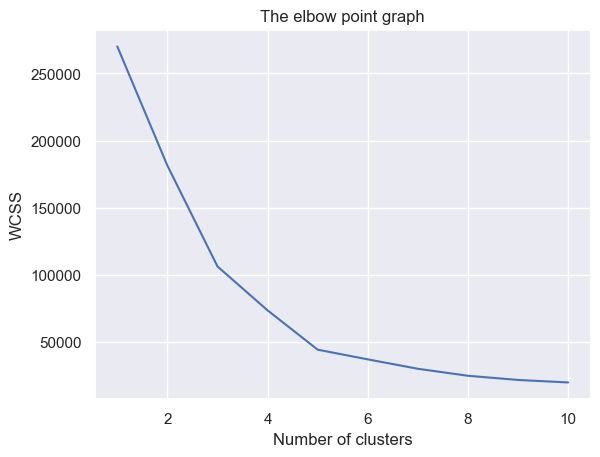

In [48]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters = 5 as 5 has the lowest value of an elbow(edge drop)

training the k-means clustering model

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing all the clusters

Text(0, 0.5, 'Spending score')

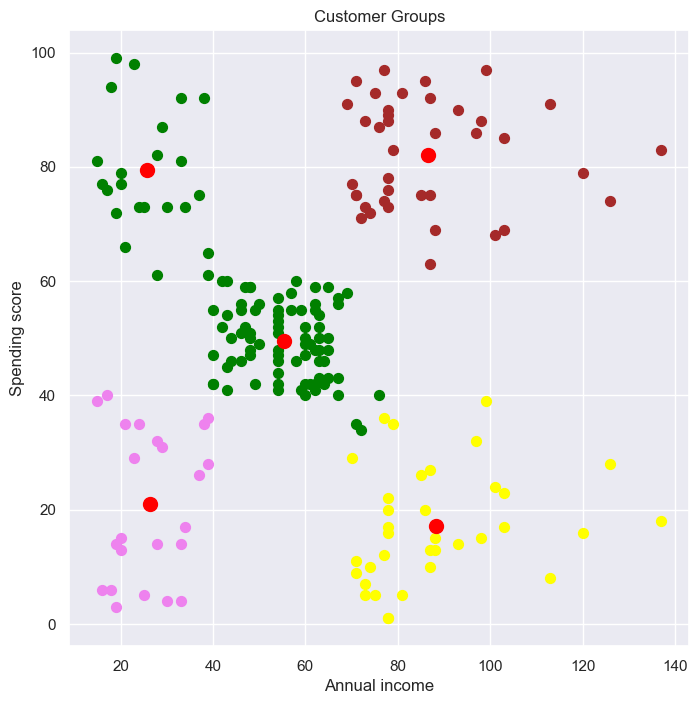

In [50]:
# plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='brown', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='green', label='Cluster 5')

#X[Y==0,0] and X[Y==0,1] select the first and second features of the data points belonging to Cluster 1.
#s=50 sets the marker size to 50.
#c='green' sets the color of the markers to green.
#label='Cluster 1' provides a label for this set of data points.

# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual income')
plt.ylabel('Spending score')

We can see there is a good size subset of people with yellow dots that have high annual income but low spending score. Moreover, there is the brown subset that has high annual income and high spending score.
This information could be useful in many cases for the mall, such as targeting the yellow subset to spend more as they have higher income.m